In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [400]:
data = pd.read_csv(r"C:\Users\Inspiron\Documents\Playground\Predicting Customer Churn\dataset\TelcoCustomerChurn.csv")

In [401]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [402]:
data.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [403]:
print("(Rows, Columns): ", data.shape)

(Rows, Columns):  (7043, 21)


In [404]:
#data = data.drop('customerID', axis=1)

In [405]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [406]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [407]:
# Categorical Encoding

label_enc = LabelEncoder()


data['Churn'] = label_enc.fit_transform(data["Churn"])
data['gender'] = label_enc.fit_transform(data["gender"])
data['Partner'] = label_enc.fit_transform(data["Partner"]) 
data['Dependents'] = label_enc.fit_transform(data["Dependents"]) 
data['PhoneService'] = label_enc.fit_transform(data["PhoneService"]) 
data['MultipleLines'] = label_enc.fit_transform(data["MultipleLines"]) 
data['InternetService'] = label_enc.fit_transform(data["InternetService"]) 
data['OnlineSecurity'] = label_enc.fit_transform(data["OnlineSecurity"])
data['OnlineBackup'] = label_enc.fit_transform(data["OnlineBackup"])
data['DeviceProtection'] = label_enc.fit_transform(data["DeviceProtection"]) 
data['TechSupport'] = label_enc.fit_transform(data["TechSupport"]) 
data['StreamingTV'] = label_enc.fit_transform(data["StreamingTV"]) 
data['StreamingMovies'] = label_enc.fit_transform(data["StreamingMovies"]) 
data['Contract'] = label_enc.fit_transform(data["Contract"]) 
data['PaperlessBilling'] = label_enc.fit_transform(data["PaperlessBilling"]) 
data['PaymentMethod'] = label_enc.fit_transform(data["PaymentMethod"]) 


data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [408]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [409]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int32
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int32
Dependents          7043 non-null int32
tenure              7043 non-null int64
PhoneService        7043 non-null int32
MultipleLines       7043 non-null int32
InternetService     7043 non-null int32
OnlineSecurity      7043 non-null int32
OnlineBackup        7043 non-null int32
DeviceProtection    7043 non-null int32
TechSupport         7043 non-null int32
StreamingTV         7043 non-null int32
StreamingMovies     7043 non-null int32
Contract            7043 non-null int32
PaperlessBilling    7043 non-null int32
PaymentMethod       7043 non-null int32
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int32
dtypes: float64(2), int32(16), int64(2), object(

In [410]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [411]:
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

In [412]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [413]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [414]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [415]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


In [416]:
## Data Visualizations

In [417]:
#data_corr = data.corr()['Churn'].sort_values()

#data_corr.plot(kind='bar',figsize=(20,8))

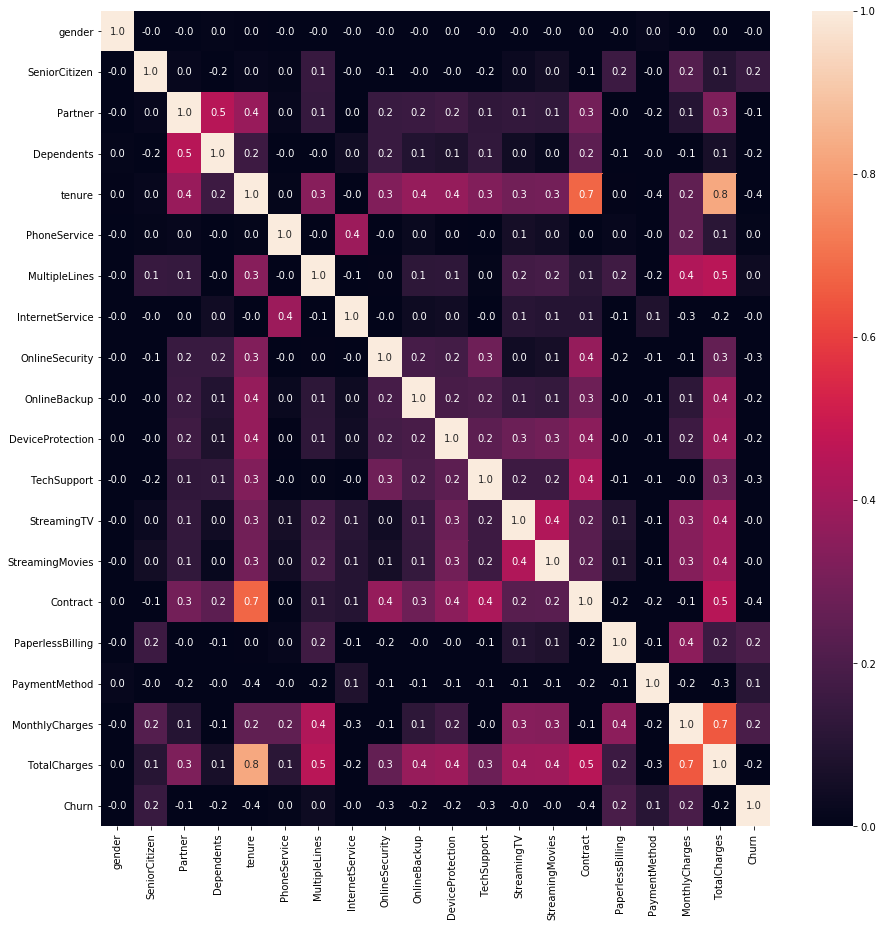

In [418]:
corr_data = data.corr()
plt.figure(figsize=(15,15))
heat_map = sns.heatmap(corr_data, annot=True, vmin=0, vmax=1, fmt=".1f")
plt.show(heat_map)

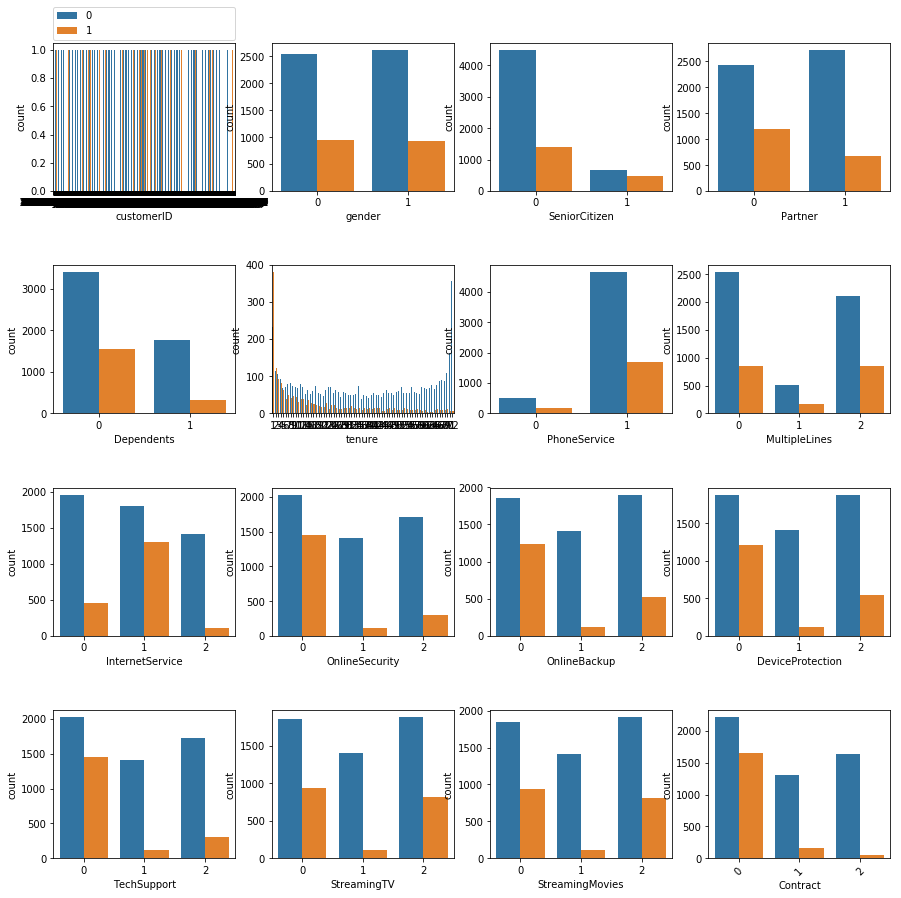

In [419]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=data.iloc[:,i], hue=data["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

In [420]:
## Feature Engineering
#from sklearn.preprocessing import StandardScaler

In [421]:
data = data.drop(['customerID', ], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
gender              7032 non-null int32
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int32
Dependents          7032 non-null int32
tenure              7032 non-null int64
PhoneService        7032 non-null int32
MultipleLines       7032 non-null int32
InternetService     7032 non-null int32
OnlineSecurity      7032 non-null int32
OnlineBackup        7032 non-null int32
DeviceProtection    7032 non-null int32
TechSupport         7032 non-null int32
StreamingTV         7032 non-null int32
StreamingMovies     7032 non-null int32
Contract            7032 non-null int32
PaperlessBilling    7032 non-null int32
PaymentMethod       7032 non-null int32
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int32
dtypes: float64(2), int32(16), int64(2)
memory usage: 659.3 KB


In [422]:
#data.column.values

In [423]:
#data['Churn'].astype(int)
#data.dtypes_
#data.head()

In [424]:
## Modelling


X = data.drop(['Churn'], axis=1)
y = data['Churn']

In [425]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)





In [426]:
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [427]:
#Fit the logistic Regression Model
lrModel = LogisticRegression()
lrModel.fit(X_train, y_train)

lr_pred = lrModel.predict(X_test)

print("Training set score: {:.3f}".format(lrModel.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lrModel.score(X_test, y_test)))

#log_loss(true_label, predicted_prob)

print("Log Loss: ", log_loss(y_test, lr_pred))

# Predict the probability of Churn of each customer
data['Probability_of_Churn'] = lrModel.predict_proba(data[X_test.columns])[:,1]


data['Probability_of_Churn'].head(5)

Training set score: 0.803
Test set score: 0.807
Log Loss:  6.6525193742311695


0    0.568308
1    0.060614
2    0.386080
3    0.025867
4    0.657644
Name: Probability_of_Churn, dtype: float64

In [428]:
#Fit the logistic Regression Model
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print("Training set score: {:.3f}".format(rfc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rfc.score(X_test, y_test)))

#log_loss(true_label, predicted_prob)

print("Log Loss: ", log_loss(y_test, rfc_pred))

# Predict the probability of Churn of each customer
data['Probability_of_Churn'] = rfc.predict_proba(data[X_test.columns])[:,1]


data['Probability_of_Churn'].head(5)

Training set score: 0.983
Test set score: 0.787
Log Loss:  7.364399772156315


0    0.1
1    0.0
2    0.7
3    0.0
4    0.8
Name: Probability_of_Churn, dtype: float64

In [429]:
#Sample Model Prediction

pd.DataFrame(lr_pred, columns=['Probability_of_Churn']).to_csv('sample_prediction.csv')

prediction = pd.read_csv(r"C:\Users\Inspiron\Documents\Playground\sample_prediction.csv")



In [430]:
prediction.head()

,Unnamed: 0,Probability_of_Churn
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1


In [431]:
data.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Probability_of_Churn'], dtype=object)